In [1]:
import os
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta


Load Data

In [2]:
# Grab file list from dir
dataFiles = os.listdir("dataFiles")
dataFiles = [f"dataFiles/{fName}" for fName in dataFiles]
dataFiles.sort()
dataFiles

['dataFiles/copenhagen_2018.res',
 'dataFiles/copenhagen_2019.res',
 'dataFiles/copenhagen_2021.res',
 'dataFiles/copenhagen_2022.res',
 'dataFiles/switzerland_2018.res',
 'dataFiles/switzerland_2019.res',
 'dataFiles/switzerland_2021.res',
 'dataFiles/switzerland_2022.res']

In [3]:
df = pd.read_pickle(dataFiles[4])

Pre process data

In [4]:
# Remove top row (contains Nones)
df = df[1:]
# Put swim times in consistant format 
df['Swim Time'] = df['Swim Time'].apply(lambda x: '00:' + x if len(x.split(':')) < 3 else x)

In [5]:
# Convert time columns to duration
df['Swim Time'] = pd.to_timedelta(df['Swim Time'],errors='coerce')
df['Bike Time'] = pd.to_timedelta(df['Bike Time'])
df['Run Time'] = pd.to_timedelta(df['Run Time'])

df['Overall Time'] = pd.to_timedelta(df['Overall Time'])


In [6]:
df

,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status
1,2,"Van berkel, Jan",Switzerland,Male,MPRO,1,0 days 08:09:18,1,0 days 00:50:25,2,0 days 04:29:50,7,0 days 02:45:18,1,Finisher
2,30,"Plese, David",Slovenia,Male,MPRO,2,0 days 08:13:27,2,0 days 00:51:44,11,0 days 04:19:04,2,0 days 02:57:38,7,Finisher
3,3,"Wurf, Cameron",Australia,Male,MPRO,3,0 days 08:14:13,3,0 days 00:56:11,37,0 days 04:14:52,1,0 days 02:58:58,8,Finisher
4,38,"Phillips, Mike",New Zealand,Male,MPRO,4,0 days 08:17:36,4,0 days 00:50:30,7,0 days 04:29:46,6,0 days 02:53:26,4,Finisher
5,1,"Schildknecht, Ronnie",Switzerland,Male,MPRO,5,0 days 08:21:52,5,0 days 00:54:54,24,0 days 04:30:58,8,0 days 02:51:31,3,Finisher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,25,"Chikin, Alexander",Russia,Male,MPRO,,NaT,,0 days 00:58:56,59,0 days 04:35:37,12,NaT,,DNF
1742,33,"Christensen, Bekim",Denmark,Male,MPRO,,NaT,,0 days 01:06:02,182,0 days 04:41:54,13,NaT,,DNF
1743,40,"Koutny, Philipp",Switzerland,Male,MPRO,,NaT,,0 days 00:51:39,9,0 days 04:28:38,3,NaT,,DNF
1744,464,"George, Hillary",United States,Female,F25-29,,NaT,,0 days 02:00:47,1514,NaT,,NaT,,DNF


Helpful functions

In [7]:
def remove_pros(df):
    return df.drop(df[(df["Division"] == 'FPRO') | (df["Division"] == 'MPRO')].index)


In [8]:
def calculate_bike_speed(bike_time):
    """Calculate the speed in km/h for IM bike duration"""

    bike_distance = 180.2 # 112mile, 180.2km 

    bike_speed_kms = bike_distance / bike_time.total_seconds()

    bike_speed_kmh = bike_speed_kms * 3600

    return bike_speed_kmh    

In [9]:
def calculate_pace(time, distance):
    """Calculate the pace of given time/ distance""" 

    if pd.isnull(time):
        return np.nan

    time = time.total_seconds() / 60 # Minutes

    pace = time / distance

    return timedelta(minutes=int(pace), seconds=int((pace % 1) * 60))

In [10]:
def line_of_best_fit(x,y):
    # Calculate line of best fit
    run = run_bike['Run Pace']
    bike = run_bike['Bike Speed']

    coefficients = np.polyfit(x, y, 1)
    poly = np.poly1d(coefficients)
    line_x = np.linspace(min(x), max(x), 100)
    line_y = poly(line_x)

    return line_x, line_y

In [11]:
def convert_dur_sec(dur):
    """Converts df duration column from HHMMSS timedelta to S"""
    return dur.total_seconds()

In [12]:
def plot_scatter(x,y):
    plt.scatter(x, y)

    line_x, line_y = line_of_best_fit(x, y)
    plt.plot(line_x, line_y, color='red')

    plt.show()
    

Bike speed vs Run pace

In [13]:
# Add paces to DF
df['Swim Pace'] = df['Swim Time'].apply(calculate_pace, args=(39,)) # 39 lots of 100m in 3.9k, will give answer in min/100m
df['Run Pace'] = df['Run Time'].apply(calculate_pace, args=(26.2,)) # 26.2 miles, pace in minutes per mile 
df['Bike Speed'] = df['Bike Time'].apply(calculate_bike_speed)

In [14]:
run_bike = df[['Bib', 'Bike Speed', 'Run Pace']]
run_bike['Run Pace'] = run_bike['Run Pace'].apply(lambda x: x.total_seconds() / 60)
run_bike = run_bike.dropna()
run_bike

/tmp/ipykernel_11414/2268592386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_bike['Run Pace'] = run_bike['Run Pace'].apply(lambda x: x.total_seconds() / 60)


,Bib,Bike Speed,Run Pace
1,2,40.069179,6.300000
2,30,41.734431,6.766667
3,3,42.422182,6.816667
4,38,40.079081,6.616667
5,1,39.901587,6.533333
...,...,...,...
1378,1637,25.240059,15.633333
1379,1562,23.503496,14.350000
1380,1563,25.065492,15.650000
1381,516,22.985508,13.116667


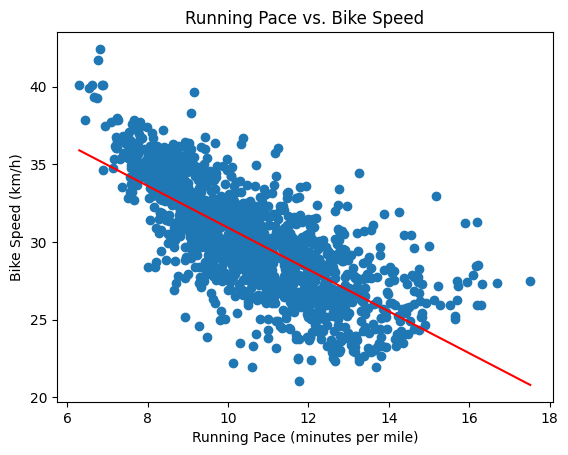

In [15]:
plt.scatter(run_bike['Run Pace'], run_bike['Bike Speed'])

line_x, line_y = line_of_best_fit(run_bike['Run Pace'], run_bike['Bike Speed'])
plt.plot(line_x, line_y, color='red')

plt.xlabel('Running Pace (minutes per mile)')
plt.ylabel('Bike Speed (km/h)')
plt.title('Running Pace vs. Bike Speed')


plt.show()

Proportion of time on Bike vs Run

In [16]:
p_run_bike = df[['Overall Time', 'Bike Time', 'Run Time', 'Bike Speed', 'Run Pace']]
p_run_bike = p_run_bike.dropna()

In [17]:
# Convert duration columns to seconds
dur_cols = ['Overall Time', 'Bike Time', 'Run Time']
for col in dur_cols:
    p_run_bike[col] = p_run_bike[col].apply(convert_dur_sec)

In [18]:
# Save typing
ot = p_run_bike['Overall Time']
bt = p_run_bike['Bike Time']
rt = p_run_bike['Run Time']

In [19]:
# Proportion of bike and run time of overall time
p_run_bike['Bike pc'] = bt / ot
p_run_bike['Run pc'] = rt / ot

In [20]:
# Look at those between 11 and 14 hours
# p_run_bike = p_run_bike.drop(p_run_bike[(p_run_bike["Overall Time"] < 39600) | (p_run_bike["Overall Time"] > 50400)].index)

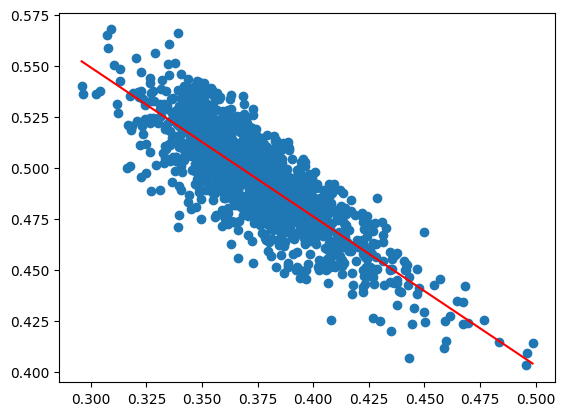

In [21]:
# Proportion of overall time on bike vs run
plot_scatter(p_run_bike['Run pc'], p_run_bike['Bike pc'])

In [23]:
print(f"Mean proportion for bike: {p_run_bike['Bike pc'].mean()}")
print(f"Mean proportion for run: {p_run_bike['Run pc'].mean()}")

Mean proportion for bike: 0.4944726328656488
Mean proportion for run: 0.3748499335432472


Taking longer on the bike leads to a lower overall time, taking longer on the run leads to higher overall time

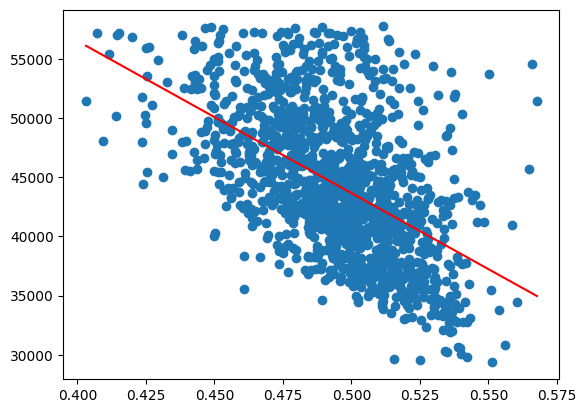

In [26]:
# Proportion of time on bike vs overall time
plot_scatter(p_run_bike['Bike pc'], p_run_bike['Overall Time'])

Above shows that spending a higher proportion of time on the bike lead to a lower overall time. 

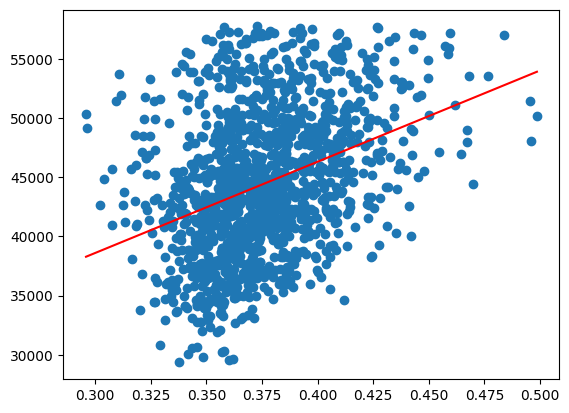

In [27]:
# Proportion of time on bike vs overall time
plot_scatter(p_run_bike['Run pc'], p_run_bike['Overall Time'])

Above shows that spending a higher proportion of time on the run leads to a higher overall time. 